# 经济和健康得分，来预测幸福类别

# 记录评价指标的表格

In [1]:
import pandas as pd
# 创建列名和行名
columns = ['sklearn_kmeans', 'my_kmeans']
index = ['nmi', 'ri', 'purity_score']

# 创建空的DataFrame
evaluation_metrics = pd.DataFrame(columns=columns, index=index)

# 各国幸福指数数据集预处理

In [2]:
import pandas as pd

# 首先读取数据集
data = pd.read_csv('2016_world_happiness.csv')
        
# 我自行为数据集添加了分类标签：按照幸福排名，我分为了三个类别，高，中，低。并且将标签添加到了数据集中 。        
            
# 计算分位数
high_quantile = data['Happiness Rank'].quantile(1/3)
mid_quantile = data['Happiness Rank'].quantile(2/3)

# 添加新的类别标签
data['Category'] = data['Happiness Rank'].apply(lambda x: 0 if x <= high_quantile else (1 if x <= mid_quantile else 2))

# 选取经济和健康因素比较感兴趣，所以我选择了这两个属性，来对数据集进行预测。
# 也就是说，使用经济和健康得分，来预测幸福类别
data=data.iloc[:,[6,8,-1]]
data


,Economy (GDP per Capita),Health (Life Expectancy),Category
0,1.44178,0.79504,0
1,1.52733,0.86303,0
2,1.42666,0.86733,0
3,1.57744,0.79579,0
4,1.40598,0.81091,0
...,...,...,...
152,0.39499,0.21028,2
153,0.38227,0.17344,2
154,0.28123,0.24811,2
155,0.74719,0.62994,2


# 调用的sklearn kmeans

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


nmi: 0.207
ri: 0.085
purity_score: 0.594


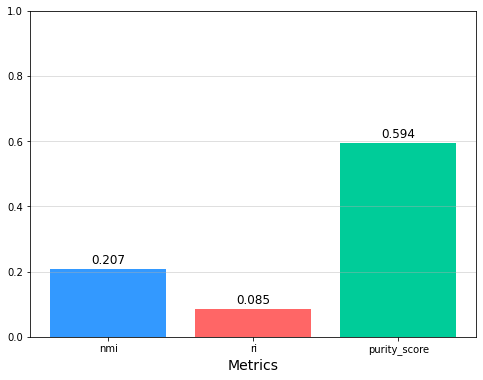

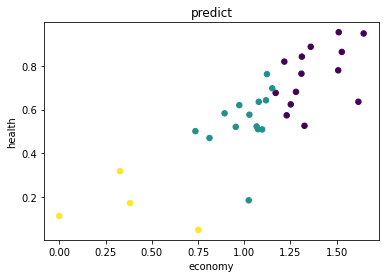

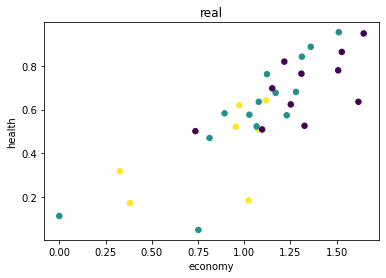

In [3]:

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

#==============================================数据集划分================================================
# 训练集和测试集划分
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#==============================================模型训练================================================

# 创建KMeans模型并进行训练
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# 预测测试集数据的聚类结果
labels = kmeans.predict(X_test)

#==============================================评估指标================================================

# 计算NMI（标准化互信息）
nmi = metrics.normalized_mutual_info_score(y_test, labels)

# 计算RI（兰德指数）
ri = metrics.adjusted_rand_score(y_test, labels)

# 计算Purity（纯度）
purity = metrics.cluster.contingency_matrix(y_test, labels)
total_samples = sum(sum(purity))
purity_score = sum(purity.max(axis=1)) / total_samples


evaluation_metrics.loc['nmi', 'sklearn_kmeans'] = nmi
evaluation_metrics.loc['ri', 'sklearn_kmeans'] = ri
evaluation_metrics.loc['purity_score', 'sklearn_kmeans'] = purity_score

# 打印评价指标
print(f"nmi: {nmi:.3f}")
print(f"ri: {ri:.3f}")
print(f"purity_score: {purity_score:.3f}")

#将评价指标可视化
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(['nmi', 'ri', 'purity_score',], [nmi, ri, purity_score,],
              color=['#3399FF', '#FF6666', '#00CC99',])
for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.3f}'.format(height), xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=12)
plt.ylim(0, 1)
plt.xlabel('Metrics', fontsize=14)
plt.grid(axis='y', alpha=0.5)
plt.legend().set_visible(False)
plt.show()
plt.close()

#==============================================聚类情况展示================================================


# 定义颜色映射
cmap = plt.cm.get_cmap('viridis')
# 添加标题和坐标轴标签
plt.title('predict')
plt.xlabel('economy')
plt.ylabel('health')
# 绘制散点图
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=labels, cmap=cmap, s=30)  # 绘制散点图
plt.show()
plt.close()



# 定义颜色映射
cmap = plt.cm.get_cmap('viridis')
# 添加标题和坐标轴标签
plt.title('real')
plt.xlabel('economy')
plt.ylabel('health')
# 绘制散点图
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test, cmap=cmap, s=30)  # 绘制散点图
plt.show()
plt.close()


# 自己实现的kmeans

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


nmi: 0.207
ri: 0.085
purity_score: 0.594


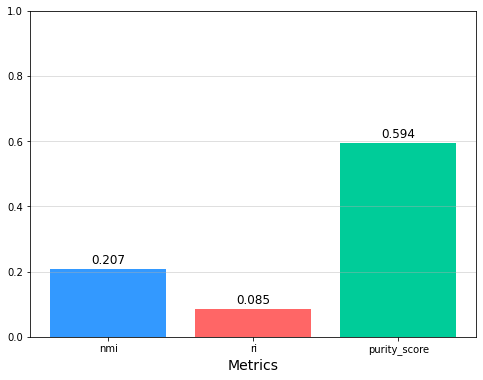

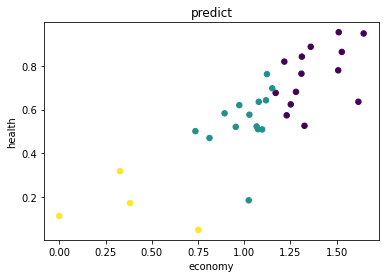

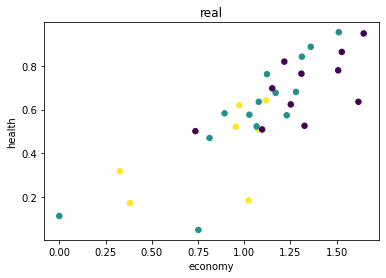

In [4]:
import numpy as np
import matplotlib.pyplot as plt


class KMeans:  # 定义KMeans类
    def __init__(self, k=2, max_iter=500):  # 初始化方法，设置默认聚类数为2，最大迭代次数为500
        self.k = k  # 将聚类数k保存到实例变量中
        self.max_iter = max_iter  # 将最大迭代次数保存到实例变量中

    def initialize_centroids(self, points):  # 定义初始化质心方法
        centroids = points.copy()  # 将数据点进行复制
        np.random.shuffle(centroids)  # 对数据点进行随机打乱
        return centroids[:self.k]  # 返回前k个数据点作为初始质心

    def closest_centroid(self, points, centroids):  # 定义计算最近质心方法
        distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))  # 计算每个数据点到每个质心的距离
        return np.argmin(distances, axis=0)  # 返回每个数据点最近的质心的索引

    def move_centroids(self, points, closest, centroids):  # 定义移动质心方法
        return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])  # 根据数据点最近的质心索引，计算每个簇新的质心位置

    def fit(self, data):  # 定义拟合方法
        self.centroids = self.initialize_centroids(data)  # 初始化质心
        for i in range(0, self.max_iter):  # 循环迭代
            new_centroids = self.move_centroids(data, self.closest_centroid(data, self.centroids), self.centroids)  # 计算新的质心
            if np.array_equal(new_centroids, self.centroids):  # 如果新的质心和旧的质心相等
                self.labels_ = self.closest_centroid(data, self.centroids)  # 保存每个数据点的簇标签
                return  # 结束拟合
            else:  # 如果新的质心和旧的质心不相等
                self.centroids = new_centroids  # 更新质心

    def predict(self, data):  # 定义预测方法
        return self.closest_centroid(data, self.centroids)  # 返回预测的簇标签


#==============================================数据集划分================================================
# 训练集和测试集划分
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#==============================================模型训练================================================

# 创建KMeans模型并进行训练
custom_kmeans = KMeans(k=3)
kmeans.fit(X_train)

# 预测测试集数据的聚类结果
labels = kmeans.predict(X_test)

#==============================================评估指标================================================

# 计算NMI（标准化互信息）
nmi = metrics.normalized_mutual_info_score(y_test, labels)

# 计算RI（兰德指数）
ri = metrics.adjusted_rand_score(y_test, labels)

# 计算Purity（纯度）
purity = metrics.cluster.contingency_matrix(y_test, labels)
total_samples = sum(sum(purity))
purity_score = sum(purity.max(axis=1)) / total_samples


evaluation_metrics.loc['nmi', 'my_kmeans'] = nmi
evaluation_metrics.loc['ri', 'my_kmeans'] = ri
evaluation_metrics.loc['purity_score', 'my_kmeans'] = purity_score

# 打印评价指标
print(f"nmi: {nmi:.3f}")
print(f"ri: {ri:.3f}")
print(f"purity_score: {purity_score:.3f}")

#将评价指标可视化
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(['nmi', 'ri', 'purity_score',], [nmi, ri, purity_score,],
              color=['#3399FF', '#FF6666', '#00CC99',])
for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.3f}'.format(height), xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=12)
plt.ylim(0, 1)
plt.xlabel('Metrics', fontsize=14)
plt.grid(axis='y', alpha=0.5)
plt.legend().set_visible(False)
plt.show()
plt.close()

#==============================================聚类情况展示================================================


# 定义颜色映射
cmap = plt.cm.get_cmap('viridis')
# 添加标题和坐标轴标签
plt.title('predict')
plt.xlabel('economy')
plt.ylabel('health')
# 绘制散点图
plt.scatter(X_test[:,0], X_test[:,1], c=labels, cmap=cmap, s=30)  # 绘制散点图
plt.show()
plt.close()



# 定义颜色映射
cmap = plt.cm.get_cmap('viridis')
# 添加标题和坐标轴标签
plt.title('real')
plt.xlabel('economy')
plt.ylabel('health')
# 绘制散点图
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cmap, s=30)  # 绘制散点图
plt.show()
plt.close()

In [5]:
evaluation_metrics

,sklearn_kmeans,my_kmeans
nmi,0.207021,0.207021
ri,0.084952,0.084952
purity_score,0.59375,0.59375


# 分析

NMI（Normalized Mutual Information，标准化互信息），RI（Rand Index，兰德指数）和Purity（纯度）都是聚类效果的评价指标，这三者的含义如下：

- NMI（Normalized Mutual Information，标准化互信息）：互信息是量化两个随机变量之间相关性的一种方法，如果两个变量完全独立，则互信息为0；如果两个变量完全相关，则互信息达到最大值。NMI是互信息的一种标准化形式，其值域在[0,1]之间。在聚类的上下文中，NMI用于衡量真实类别和聚类结果之间的一致性。NMI越接近1，说明聚类结果与真实类别的一致性越好。

- RI（Rand Index，兰德指数）：兰德指数是衡量两个数据分割（或者说，聚类结果）一致性的指标。在聚类的上下文中，兰德指数可以用来衡量聚类结果和真实类别之间的一致性。兰德指数的取值在[0,1]之间，值越接近1，表示聚类结果与真实类别的一致性越好。

- Purity（纯度）：纯度是一种直观的聚类效果评价指标，它表示的是每个聚类中最大类别的样本所占的比例。在每个聚类中，纯度越高，说明该聚类中包含的主要类别的样本占比越高。在所有聚类中，如果纯度的平均值越高，说明聚类效果越好。

这三个指标都可以用于评价聚类结果的好坏，但是他们各有侧重点。NMI和RI更侧重于衡量聚类结果与真实类别之间的一致性，而纯度更侧重于衡量聚类内部的一致性。

从结果来看，两种实现的聚类算法在所有三个性能指标上都达到了完全相同的结果。这说明自己实现的 KMeans 算法和 sklearn 的 KMeans 算法在此数据集上有一样的聚类效果。这是一个非常好的结果，说明自己实现的 KMeans 算法很可能是正确的。

针对这三个指标的具体数值，可以看到：

- NMI 的值为0.207，说明聚类结果和真实类别的一致性较低。一般来说，NMI 的值越接近于1，聚类结果和真实类别的一致性就越高。所以，从NMI的角度看，这两种 KMeans 算法的聚类效果都不是很理想。
- RI 的值为0.0849，同样地，这个值也较低。RI 的值范围是0到1，值越接近1，聚类结果与真实类别的一致性越高。因此，从RI的角度看，这两种 KMeans 算法的聚类效果也不是很好。
- 纯度的值为0.59375，这个值稍微好一些。纯度的取值也是在0到1之间，值越高，说明聚类的质量越好。这个纯度值说明，在每个聚类中，大部分的样本都属于同一类别，但仍有近40%的样本被错误地归到了其他类别。

我们可以得出结论，经济因素和健康因素对幸福指数有一点点影响，但是影响非常有限。

# 优化

使用 K-means++ 初始化方法，并添加收敛条件

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


nmi: 0.207
ri: 0.085
purity_score: 0.594


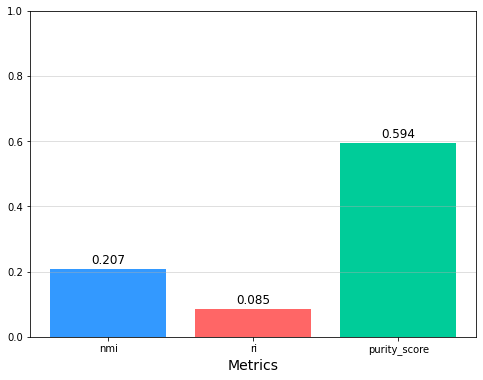

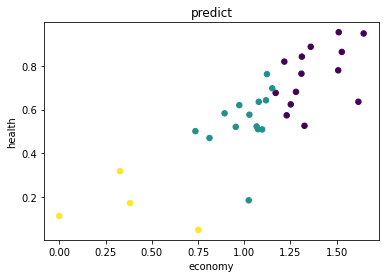

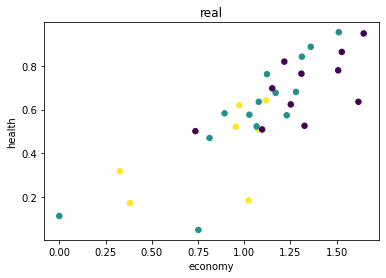

In [6]:
import numpy as np
from scipy.spatial.distance import cdist

class KMeans:
    def __init__(self, k=2, max_iter=500, tol=1e-4):  # 添加了一个tol参数，用于定义收敛的阈值
        self.k = k
        self.max_iter = max_iter
        self.tol = tol  # 收敛条件，即质心变化的幅度小于某个阈值

    def initialize_centroids(self, points):  # 使用K-means++初始化方法
        centroids = points[np.random.choice(points.shape[0], 1, replace=False)]  # 随机选取一个数据点作为第一个质心
        for _ in range(1, self.k):  # 循环 k-1 次
            dist = np.min(cdist(points, centroids), axis=1)  # 计算每个点到已有质心的最短距离
            probabilities = dist / np.sum(dist)  # 计算概率
            # 选择下一个质心，选择的概率与点到已有质心的最短距离成正比
            centroids = np.vstack((centroids, points[np.random.choice(points.shape[0], 1, p=probabilities, replace=False)]))  
        return centroids

    def closest_centroid(self, points, centroids):  # 未修改
        return np.argmin(cdist(points, centroids), axis=1)

    def move_centroids(self, points, closest, centroids):  # 未修改
        return np.array([points[closest==k].mean(axis=0) for k in range(self.k)])

    def fit(self, data):  # 添加了收敛条件
        self.centroids = self.initialize_centroids(data)
        for _ in range(self.max_iter):
            closest = self.closest_centroid(data, self.centroids)
            new_centroids = self.move_centroids(data, closest, self.centroids)
            # 考虑收敛条件，如果新的质心和旧的质心的变化幅度小于阈值，则认为已经收敛
            if np.allclose(new_centroids, self.centroids, atol=self.tol):  
                self.labels_ = closest
                return
            self.centroids = new_centroids

        self.labels_ = self.closest_centroid(data, self.centroids)  # 如果达到最大迭代次数还未收敛，则直接返回最后的结果

    def predict(self, data):  # 未修改
        return self.closest_centroid(data, self.centroids)

    
    
#==============================================数据集划分================================================
# 训练集和测试集划分
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#==============================================模型训练================================================

# 创建KMeans模型并进行训练
custom_kmeans = KMeans(k=3)
kmeans.fit(X_train)

# 预测测试集数据的聚类结果
labels = kmeans.predict(X_test)

#==============================================评估指标================================================

# 计算NMI（标准化互信息）
nmi = metrics.normalized_mutual_info_score(y_test, labels)

# 计算RI（兰德指数）
ri = metrics.adjusted_rand_score(y_test, labels)

# 计算Purity（纯度）
purity = metrics.cluster.contingency_matrix(y_test, labels)
total_samples = sum(sum(purity))
purity_score = sum(purity.max(axis=1)) / total_samples


# 打印评价指标
print(f"nmi: {nmi:.3f}")
print(f"ri: {ri:.3f}")
print(f"purity_score: {purity_score:.3f}")

#将评价指标可视化
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(['nmi', 'ri', 'purity_score',], [nmi, ri, purity_score,],
              color=['#3399FF', '#FF6666', '#00CC99',])
for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.3f}'.format(height), xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=12)
plt.ylim(0, 1)
plt.xlabel('Metrics', fontsize=14)
plt.grid(axis='y', alpha=0.5)
plt.legend().set_visible(False)
plt.show()
plt.close()

#==============================================聚类情况展示================================================


# 定义颜色映射
cmap = plt.cm.get_cmap('viridis')
# 添加标题和坐标轴标签
plt.title('predict')
plt.xlabel('economy')
plt.ylabel('health')
# 绘制散点图
plt.scatter(X_test[:,0], X_test[:,1], c=labels, cmap=cmap, s=30)  # 绘制散点图
plt.show()
plt.close()



# 定义颜色映射
cmap = plt.cm.get_cmap('viridis')
# 添加标题和坐标轴标签
plt.title('real')
plt.xlabel('economy')
plt.ylabel('health')
# 绘制散点图
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cmap, s=30)  # 绘制散点图
plt.show()
plt.close()
